## Live Coding Technical Evaluation | 30 Min

#### Import Libraries & Setup Engines

In [1]:
from datetime import datetime as dt 
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

#### Read file 1 into df
I'm guessing these files will either be a csv or xlsx

In [51]:
df0 = pd.read_csv('andromeda_ivrs_enrollment_data_2018.csv', parse_dates=['Screen Date', 'Screen Failure Date', 'Rescreen Date', 'Randomization Date'])
print(f'Records: {df0.shape[0]}') 
df0 = df0[~df0['Site Number'].isnull()]
df0.head(3)

Records: 530


,Country,Site Number,Investigator Name,Subject ID,Screen Date,Screen Failure Date,Rescreen Date,Randomization Date,Randomization Number,Patient Type
0,USA,44024.0,Ricky Martin,3.620405e+10,2017-05-24,NaT,NaT,2017-08-27,7393160.0,Randomized
1,USA,44024.0,Ricky Martin,3.620405e+10,2017-05-24,NaT,NaT,NaT,NaN,In-Screening
2,USA,43996.0,Beth Sanchez,3.620402e+10,2017-06-04,NaT,NaT,NaT,NaN,In-Screening


#### Read file 2 into df

In [64]:
df1 = pd.read_csv('andromeda_site_information_report_2018.csv')
df1.rename(columns={'Site #':'Site Number'}, inplace=True) 
print(f'Records: {df1.shape[0]}') 
df1.head(3)

Records: 1289


,Site Number,Site Status,Site Activation Date,State,Country
0,44056,Selected,NaN,MD,USA
1,44056,Selected,NaN,MD,USA
2,44054,Selected,NaN,NM,USA


In [65]:
df1.drop_duplicates(inplace=True)

In [67]:
df1['Site Number'].is_unique

True

In [68]:
new_df = df1[['Site Number', 'State', 'Country']].copy()
new_df.sort_values('Site Number', ascending=True, inplace=True) 
new_df.to_csv('ssc.csv', index=False)
new_df.head()

,Site Number,State,Country
1286,43604,MI,USA
1280,43605,NC,USA
1276,43606,IL,USA
1271,43607,PA,USA
1255,43612,PA,USA


In [52]:
df = df0.merge(df1, how='left', left_on='Site Number', right_on='Site #', validate='m:1')
print(f'Records: {df.shape[0]}') 
df.head()

Records: 527


,Country_x,Site Number,Investigator Name,Subject ID,Screen Date,Screen Failure Date,Rescreen Date,Randomization Date,Randomization Number,Patient Type,Site #,Site Status,Site Activation Date,State,Country_y
0,USA,44024.0,Ricky Martin,3.620405e+10,2017-05-24,NaT,NaT,2017-08-27,7393160.0,Randomized,44024.0,Enrolling,18-Jul-2017,FL,USA
1,USA,44024.0,Ricky Martin,3.620405e+10,2017-05-24,NaT,NaT,NaT,NaN,In-Screening,44024.0,Enrolling,18-Jul-2017,FL,USA
2,USA,43996.0,Beth Sanchez,3.620402e+10,2017-06-04,NaT,NaT,NaT,NaN,In-Screening,43996.0,Initiated,17-Aug-2017,CT,USA
3,USA,43980.0,Samuel Jackson,3.620400e+10,2017-05-29,NaT,NaT,NaT,NaN,In-Screening,43980.0,Enrolling,13-Jul-2017,OH,USA
4,USA,43956.0,Whitney Jackson,3.620398e+10,2017-04-13,NaT,NaT,2017-07-24,7393108.0,Randomized,43956.0,Enrolling,18-May-2017,SC,USA


### Q1

In [30]:
df['Patient Type'].unique()

array(['Randomized', 'In-Screening', 'Screen Failure'], dtype=object)

In [46]:
q1_df = df.copy()

In [47]:
q1_df.head()

,Country_x,Site Number,Investigator Name,Subject ID,Screen Date,Screen Failure Date,Rescreen Date,Randomization Date,Randomization Number,Patient Type,Site #,Site Status,Site Activation Date,State,Country_y
0,USA,44024.0,Ricky Martin,3.620405e+10,05/24/2017,NaN,NaN,08/27/2017,7393160.0,Randomized,44024.0,Enrolling,18-Jul-2017,FL,USA
1,USA,44024.0,Ricky Martin,3.620405e+10,05/24/2017,NaN,NaN,NaN,NaN,In-Screening,44024.0,Enrolling,18-Jul-2017,FL,USA
2,USA,43996.0,Beth Sanchez,3.620402e+10,06/04/2017,NaN,NaN,NaN,NaN,In-Screening,43996.0,Initiated,17-Aug-2017,CT,USA
3,USA,43980.0,Samuel Jackson,3.620400e+10,05/29/2017,NaN,NaN,NaN,NaN,In-Screening,43980.0,Enrolling,13-Jul-2017,OH,USA
4,USA,43956.0,Whitney Jackson,3.620398e+10,04/13/2017,NaN,NaN,07/24/2017,7393108.0,Randomized,43956.0,Enrolling,18-May-2017,SC,USA


In [74]:
x = q1_df[['Site Number', 'Subject ID']].copy()
x = x.groupby('Site Number', as_index=False).nunique()
x.sort_values('Subject ID', inplace=True, ascending=False) 
x.rename(columns={'Subject ID':'N_tot'}, inplace=True)
x.head()

,Site Number,N_tot
105,43860.0,19
36,43677.0,18
8,43626.0,13
87,43789.0,10
102,43839.0,10


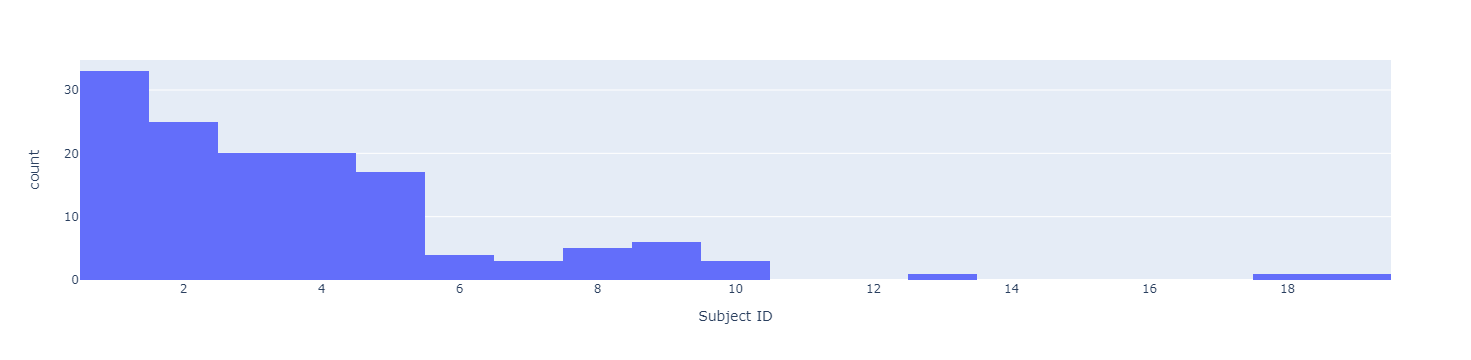

In [49]:
px.histogram(x, 'Subject ID') 

### Q2

In [41]:
q2_df = df[df['Patient Type'].isin(['Randomized'])]
q2_df.head()

,Country_x,Site Number,Investigator Name,Subject ID,Screen Date,Screen Failure Date,Rescreen Date,Randomization Date,Randomization Number,Patient Type,Site #,Site Status,Site Activation Date,State,Country_y
0,USA,44024.0,Ricky Martin,3.620405e+10,05/24/2017,NaN,NaN,08/27/2017,7393160.0,Randomized,44024.0,Enrolling,18-Jul-2017,FL,USA
4,USA,43956.0,Whitney Jackson,3.620398e+10,04/13/2017,NaN,NaN,07/24/2017,7393108.0,Randomized,43956.0,Enrolling,18-May-2017,SC,USA
5,USA,43952.0,Cameron Diaz,3.620398e+10,02/12/2017,NaN,NaN,05/29/2017,7393012.0,Randomized,43952.0,Enrolling,06-Apr-2017,IL,USA
8,USA,43947.0,Baby Spice,3.620397e+10,04/04/2017,NaN,NaN,07/22/2017,7393097.0,Randomized,43947.0,Enrolling,10-Apr-2017,FL,USA
12,USA,43938.0,Judge Judy,3.620396e+10,04/04/2017,NaN,NaN,07/14/2017,7393084.0,Randomized,43938.0,Enrolling,15-Jun-2017,IL,USA


In [75]:
x2 = q2_df[['Site Number', 'Subject ID']].copy()
x2 = x2.groupby('Site Number', as_index=False).nunique()
x2.sort_values('Subject ID', inplace=True, ascending=False) 
x2.rename(columns={'Subject ID':'N_rand'}, inplace=True)
x2.head()

,Site Number,N_rand
94,43860.0,11
42,43698.0,8
35,43677.0,8
91,43839.0,7
83,43814.0,7


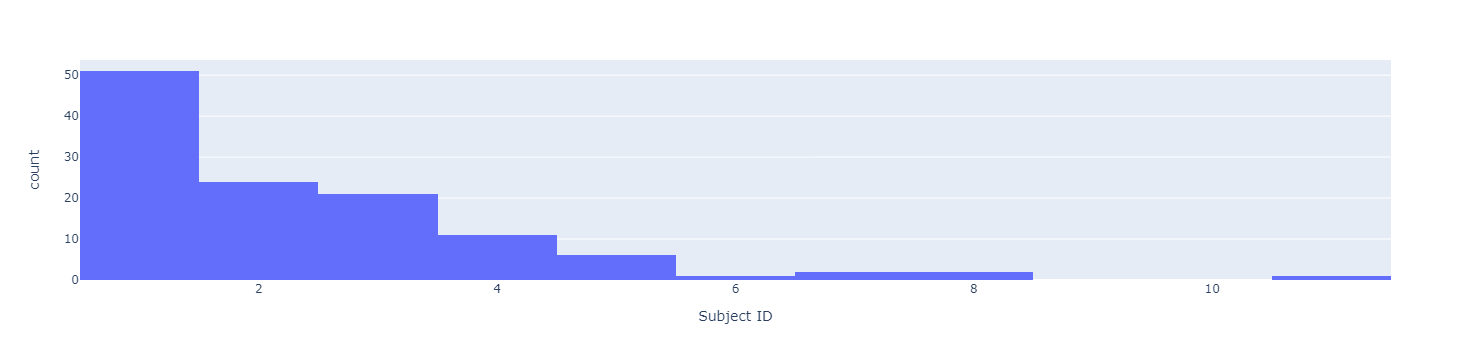

In [43]:
px.histogram(x2, 'Subject ID') 

### Q3

In [53]:
q3 = df[['Site Number', 'Patient Type', 'Randomization Date']].copy()
q3 = q3[~q3['Randomization Date'].isnull()]
q3.head()

,Site Number,Patient Type,Randomization Date
0,44024.0,Randomized,2017-08-27
4,43956.0,Randomized,2017-07-24
5,43952.0,Randomized,2017-05-29
8,43947.0,Randomized,2017-07-22
12,43938.0,Randomized,2017-07-14


In [55]:
q3.loc[:,'new_date'] = q3['Randomization Date'].dt.month + q3['Randomization Date'].dt.day
q3.head()

,Site Number,Patient Type,Randomization Date,new_date
0,44024.0,Randomized,2017-08-27,35
4,43956.0,Randomized,2017-07-24,31
5,43952.0,Randomized,2017-05-29,34
8,43947.0,Randomized,2017-07-22,29
12,43938.0,Randomized,2017-07-14,21


#### TODO: Format new_date with leading zeroes and filter

### Q4

In [56]:
q4 = df[df['Patient Type']=='Randomized'].copy()
q4.head()

,Country_x,Site Number,Investigator Name,Subject ID,Screen Date,Screen Failure Date,Rescreen Date,Randomization Date,Randomization Number,Patient Type,Site #,Site Status,Site Activation Date,State,Country_y
0,USA,44024.0,Ricky Martin,3.620405e+10,2017-05-24,NaT,NaT,2017-08-27,7393160.0,Randomized,44024.0,Enrolling,18-Jul-2017,FL,USA
4,USA,43956.0,Whitney Jackson,3.620398e+10,2017-04-13,NaT,NaT,2017-07-24,7393108.0,Randomized,43956.0,Enrolling,18-May-2017,SC,USA
5,USA,43952.0,Cameron Diaz,3.620398e+10,2017-02-12,NaT,NaT,2017-05-29,7393012.0,Randomized,43952.0,Enrolling,06-Apr-2017,IL,USA
8,USA,43947.0,Baby Spice,3.620397e+10,2017-04-04,NaT,NaT,2017-07-22,7393097.0,Randomized,43947.0,Enrolling,10-Apr-2017,FL,USA
12,USA,43938.0,Judge Judy,3.620396e+10,2017-04-04,NaT,NaT,2017-07-14,7393084.0,Randomized,43938.0,Enrolling,15-Jun-2017,IL,USA


In [58]:
q4.loc[:,'lag'] = q4['Randomization Date'] - q4['Screen Date']
q4.head()

,Country_x,Site Number,Investigator Name,Subject ID,Screen Date,Screen Failure Date,Rescreen Date,Randomization Date,Randomization Number,Patient Type,Site #,Site Status,Site Activation Date,State,Country_y,lag
0,USA,44024.0,Ricky Martin,3.620405e+10,2017-05-24,NaT,NaT,2017-08-27,7393160.0,Randomized,44024.0,Enrolling,18-Jul-2017,FL,USA,95 days
4,USA,43956.0,Whitney Jackson,3.620398e+10,2017-04-13,NaT,NaT,2017-07-24,7393108.0,Randomized,43956.0,Enrolling,18-May-2017,SC,USA,102 days
5,USA,43952.0,Cameron Diaz,3.620398e+10,2017-02-12,NaT,NaT,2017-05-29,7393012.0,Randomized,43952.0,Enrolling,06-Apr-2017,IL,USA,106 days
8,USA,43947.0,Baby Spice,3.620397e+10,2017-04-04,NaT,NaT,2017-07-22,7393097.0,Randomized,43947.0,Enrolling,10-Apr-2017,FL,USA,109 days
12,USA,43938.0,Judge Judy,3.620396e+10,2017-04-04,NaT,NaT,2017-07-14,7393084.0,Randomized,43938.0,Enrolling,15-Jun-2017,IL,USA,101 days


In [59]:
x4 = q4[['Site Number', 'lag']].groupby('Site Number', as_index=False).mean()

In [60]:
x4.head()

,Site Number,lag
0,43605.0,96 days 12:00:00
1,43606.0,100 days 00:00:00
2,43607.0,106 days 00:00:00
3,43612.0,112 days 18:00:00
4,43613.0,122 days 12:00:00


### Q5

In [78]:
df.loc[:,'month'] = df['Screen Date'].dt.month
df.head()

,Country_x,Site Number,Investigator Name,Subject ID,Screen Date,Screen Failure Date,Rescreen Date,Randomization Date,Randomization Number,Patient Type,Site #,Site Status,Site Activation Date,State,Country_y,month
0,USA,44024.0,Ricky Martin,3.620405e+10,2017-05-24,NaT,NaT,2017-08-27,7393160.0,Randomized,44024.0,Enrolling,18-Jul-2017,FL,USA,5.0
1,USA,44024.0,Ricky Martin,3.620405e+10,2017-05-24,NaT,NaT,NaT,NaN,In-Screening,44024.0,Enrolling,18-Jul-2017,FL,USA,5.0
2,USA,43996.0,Beth Sanchez,3.620402e+10,2017-06-04,NaT,NaT,NaT,NaN,In-Screening,43996.0,Initiated,17-Aug-2017,CT,USA,6.0
3,USA,43980.0,Samuel Jackson,3.620400e+10,2017-05-29,NaT,NaT,NaT,NaN,In-Screening,43980.0,Enrolling,13-Jul-2017,OH,USA,5.0
4,USA,43956.0,Whitney Jackson,3.620398e+10,2017-04-13,NaT,NaT,2017-07-24,7393108.0,Randomized,43956.0,Enrolling,18-May-2017,SC,USA,4.0


In [80]:
q5 = df[['Site Number', 'month']].groupby('Site Number', as_index=False).nunique()
q5.head()

,Site Number,month
0,43605.0,4
1,43606.0,1
2,43607.0,2
3,43612.0,3
4,43613.0,3


### Merge 

In [81]:
result = new_df.merge(x).merge(x2).merge(x4).merge(q5)
result.head()

,Site Number,State,Country,N_tot,N_rand,lag,month
0,43605,NC,USA,4,4,96 days 12:00:00,4
1,43606,IL,USA,1,1,100 days 00:00:00,1
2,43607,PA,USA,4,2,106 days 00:00:00,2
3,43612,PA,USA,5,4,112 days 18:00:00,3
4,43613,IN,USA,3,2,122 days 12:00:00,3


In [82]:
result.to_csv('results.csv') 

***